# Preparation

In [ ]:
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Data_Analysis/Ukraine_Tweet

Mounted at /content/drive
/content/drive/MyDrive/Data_Analysis/Ukraine_Tweet


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,17,1360804620155695106,patriot_singles,tweeting in 🇩🇪🇺🇸 ‼️Retweet does not mean endor...,NaN,747,3900,35212,2021-02-14 04:14:53.000000,1560416379110670339,...,0,NaN,1560415276847419392,19080151,TimInHonolulu,False,0,0,NaN,2022-08-19 08:04:58.985055
1,22,20687412,roburs,"Multi function software, Pascal, photo, film, ...","Essex Junction, Vermont, USA",1099,576,7096,2009-02-12 15:54:13.000000,1560416443585503232,...,0,NaN,1560407344650936320,148529707,RBReich,False,0,0,NaN,2022-08-19 07:37:01.641417
2,30,2419571971,desiignerua,NaN,NaN,159,15,173,2014-03-30 21:49:39.000000,1560416576985260032,...,0,NaN,1560220431302266880,2592057295,CrimeaUA1,False,0,0,NaN,2022-08-19 01:45:33.876851
3,32,207667138,montrezmusic,Philanthropist/Singer/Songwriter/Guitarist/New...,L A ✈ New York🚊Miami Beach ⛵,273,6884,11650,2010-10-25 20:03:20.000000,1560416594878160896,...,0,NaN,1560155377072840704,22799257,olliecarroll,True,1560309427298787328,1356158825825525760,bayraktar_1love,2022-08-19 08:07:26.571886
4,35,159802035,DaveHorn_CA,"Military/law enforcement veteran, atheist, lib...","Humboldt Bay, CA",830,1012,33376,2010-06-26 11:06:09.000000,1560416624930222080,...,0,NaN,1559995479143751680,1345739193721487360,SenTuberville,False,0,0,NaN,2022-08-19 08:07:26.487607


Removing nulls and deleting some unrelated word to analysis.

In [ ]:
df = df[["username", "in_reply_to_screen_name", "text"]]
df = df.dropna()

In [ ]:
def preprocess(text):
    text = text.lower()
    # Remove exact words: http, https, co, t
    text = re.sub(r'\b(?:http|https|co|t)\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Clean extra spaces
    return text

df['text'] = df['text'].astype(str).apply(preprocess)

In [ ]:
df.head()

,username,in_reply_to_screen_name,text,cluster
0,patriot_singles,TimInHonolulu,@timinhonolulu the only answer can be #article...,4
1,roburs,RBReich,@rbreich some day other countries will make re...,4
2,desiignerua,CrimeaUA1,@crimeaua1 #russiaisateroriststate,2
3,montrezmusic,olliecarroll,@olliecarroll #slavaukraini #glorytoukraine :/...,5
4,DaveHorn_CA,SenTuberville,@sentuberville #maga #republicans play the #sh...,4


We vectorized the message content and cluster based on it. The username and mentioned name won't be used. I keep it just in case if we need it.

# Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

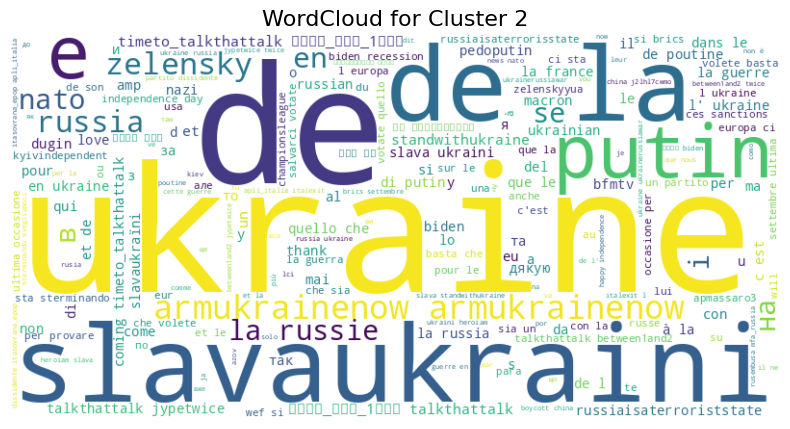

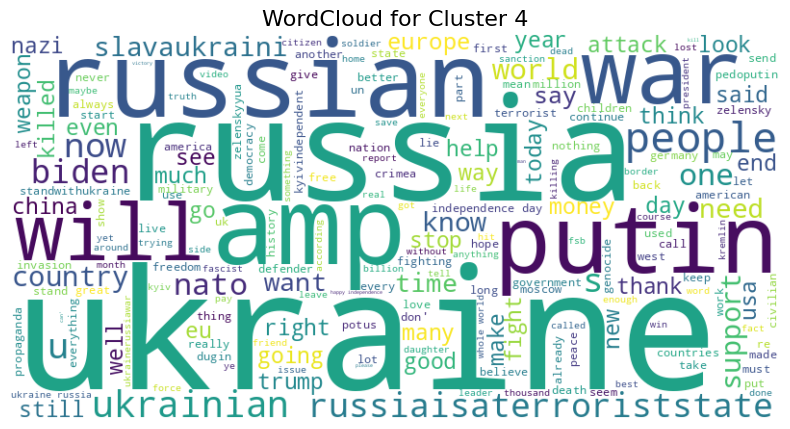

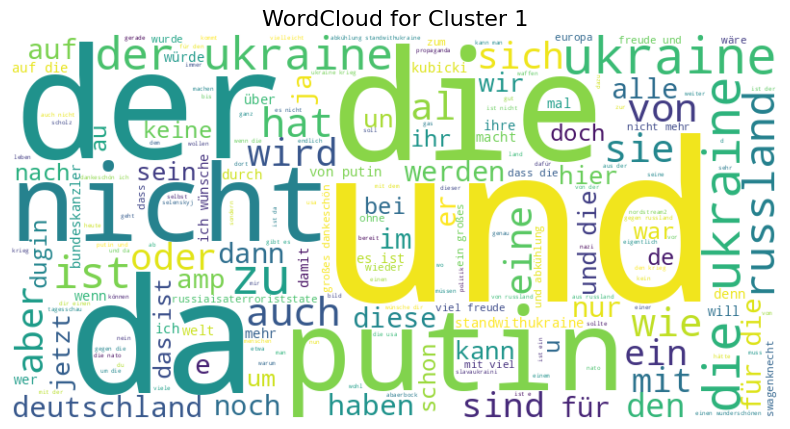

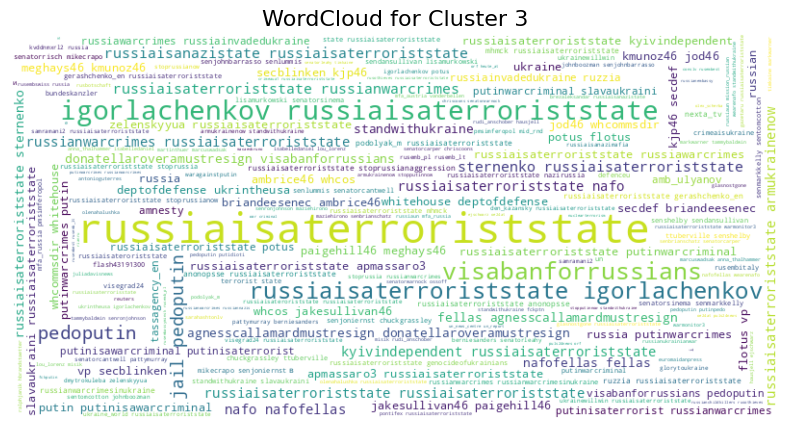

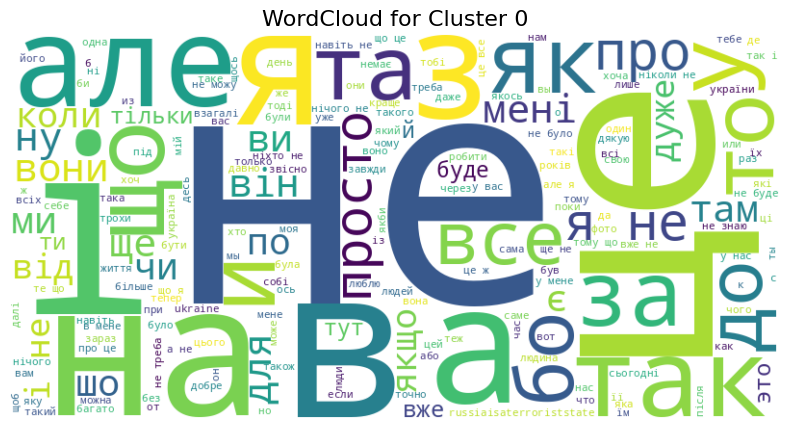

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get top 2 cluster IDs
top_clusters = df['cluster'].value_counts().head(5).index

# Create WordCloud for each
for cluster_id in top_clusters:
    text = " ".join(df[df['cluster'] == cluster_id]['text'].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Cluster {cluster_id}', fontsize=16)
    plt.show()



> Handler 01 to Shorekeeper 00, It seems that the first cluster, the biggest one, is filled with sentiments to arm ukraine and fight the russian. While the second cluster, the second biggest one, is filled with sentiments on supporting ukraine and cursing russia. The third one is... germans... and you can see many prepotitions there. The fourth one shows that these sentences are very popular in the tweets which is against Russia. The last one is Ukrainian but again, many of them are prepotitions and there is something weird with this, I don't find the word war, but notable word: love, people. This is done based on the cloudwords analysis since showing the full graph will take bunch of computing power which we don't have. Long live Republic of San Magnolia!.



In [ ]:
from sklearn.cluster import KMeans

df = pd.read_csv("data.csv")

df = df[["username", "in_reply_to_screen_name", "text"]]
df = df.dropna()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\b(?:http|https|co|t)\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['text'] = df['text'].astype(str).apply(preprocess)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

In [ ]:
df

,username,in_reply_to_screen_name,text,cluster
0,patriot_singles,TimInHonolulu,@timinhonolulu the only answer can be #article...,4
1,roburs,RBReich,@rbreich some day other countries will make re...,4
2,desiignerua,CrimeaUA1,@crimeaua1 #russiaisateroriststate,2
3,montrezmusic,olliecarroll,@olliecarroll #slavaukraini #glorytoukraine :/...,2
4,DaveHorn_CA,SenTuberville,@sentuberville #maga #republicans play the #sh...,4
...,...,...,...,...
121829,4evrJSSoulJa,POTUS,@potus stop sending our money to #ukraine ://....,2
121830,UkrainianFocus,timloughton,@timloughton thank you @timloughton for your s...,2
121831,gfernandoamb,gfernandoamb,"✅""genioux fact"": based on #ai or human #intell...",4
121832,mypurposefulLT,NBCNews,@nbcnews redacted or unredacted #certifiabletr...,4


In [ ]:
import pandas as pd
import re
import random

unique_clusters = sorted(df['cluster'].unique())

for cluster_id in unique_clusters:
    print(f"\n Cluster {cluster_id} :")
    cluster_df = df[df['cluster'] == cluster_id]

    texts_in_cluster = cluster_df['text']
    random_texts = texts_in_cluster.sample(n=10, random_state=34)
    for i, text_content in enumerate(random_texts):
        print(f"  {i+1}. {str(text_content)}")


 Cluster 0 :
  1. @electrovi4 ну хоч не через тиждень в травму пішов
  2. @getmanv86 мало розказую про це, але буду більше
  3. @yurchenkost ну коли він зроблений тобою -то краще б ніхто не бачив 😏
  4. @d_s_pero вже не можна на калаша подивитись у мене вдома одні шаблі!!!
  5. @aprioriprav бо гроші не зароблені,а "зроблені"
  6. україна з кримськотатарською автономією сильніше, а нам життєво необхідно бути сильними, а не сваритися всередині країни та відбирати у корінного народу право на їхню автономію.
  7. @ahtoh_uait та коли буде шось цікавіше, ви мені не треба будете
  8. якби я знала, що побічні ефекти можуть включати втрату коштів для існування, і ви зрештою впадете в таку депресію, що зненавидите себе, я не пішла б на такий ризик, — поділилася люнда ://./dbstvubbva
  9. хочеться продовжувати описувати все епітетами; показувати світлину калинового куща біля дому, що є водночас і "червоною калиною" і "калиною за вікном", і ще десятком інших спогадів та емоційних асоціацій. я не 

In [ ]:
import networkx as nx

cluster_data_summary = {}

for cluster_id in unique_clusters:
    new_df_for_cluster = df[df['cluster'] == cluster_id].copy()
    usernames_in_cluster = sorted(list(new_df_for_cluster['username'].unique()))
    G = nx.DiGraph()

    for _, row in new_df_for_cluster.iterrows():
        source = row['username']
        target = row['in_reply_to_screen_name']

        if pd.notna(source) and isinstance(source, str) and source.strip() and \
           pd.notna(target) and isinstance(target, str) and target.strip():
            G.add_edge(source, target)

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    cluster_data_summary[cluster_id] = {'usernames': usernames_in_cluster,
                                        'num_nodes': num_nodes,
                                        'num_edges': num_edges,}

sorted_clusters = sorted(cluster_data_summary.items(), key=lambda item: item[1]['num_nodes'], reverse=True)

for i, (cluster_id, data) in enumerate(sorted_clusters):
  print(f"\n{i+1}) Cluster {cluster_id} :")
  print(f"Number of Unique Users (Nodes): {data['num_nodes']}")
  print(f"Number of Interactions (Edges): {data['num_edges']}")
  cluster = df[df['cluster'] == cluster_id]
  random_user = cluster['username'].sample(n=5)
  print(random_user)


1) Cluster 2 :
Number of Unique Users (Nodes): 35454
Number of Interactions (Edges): 42308
70190       life_korotke
66214          Pan_M_165
25255           stogilka
113632      wolfigelkott
86928     chanceuxleluke
Name: username, dtype: object

2) Cluster 4 :
Number of Unique Users (Nodes): 23279
Number of Interactions (Edges): 27328
83165     BrizelZalmen
97913    OkayFutureBoy
71239        iryna8700
86312           poesur
31002    TutberidzeTea
Name: username, dtype: object

3) Cluster 1 :
Number of Unique Users (Nodes): 6883
Number of Interactions (Edges): 8569
93563       RolfMeissler
77876       JosefinePaul
16270    SturmWarnung202
5190          JochenH_14
81272        Fazer_DDorf
Name: username, dtype: object

4) Cluster 3 :
Number of Unique Users (Nodes): 4579
Number of Interactions (Edges): 5729
105134            CousetK
97090     delaila12418400
12998          rcmanovana
61842          ilya888888
58365         DigitalowlT
Name: username, dtype: object

5) Cluster 0 :
Numbe